In [124]:
import numpy as np
import pandas as pd
from scipy import stats as st
from matplotlib import pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns
from matplotlib.pyplot import figure
plt.style.use('ggplot')

In [3]:
# Import CSV
Vivino = pd.read_csv('vivino_wine_final.csv',encoding = "ISO-8859-1")
Vivino.head()

,winery,wine_type,city,country,wine_name,year,overall_rating,overall_rating_count,price,light_bold,smooth_tannic,dry_sweet,soft_acidic
0,Daring Escape,Red wine,California,United States,Red,2017,4.2,30,6.99,75.7310,54.6576,6.92299,64.80330
1,Bodegas Aragonesas,Red wine,Campo de Borja,Spain,Don Ramón Pérez Juan,2018,3.9,1485,8.99,60.5850,33.9988,4.56559,39.85480
2,New Age,Red wine,Mendoza,Argentina,Tinto Dulce,-1,3.9,412,8.99,-1.0000,-1.0000,-1.00000,-1.00000
3,Bodegas Virgen de la Sierra,Red wine,Calatayud,Spain,OGV Old Vines Garnacha,2018,3.9,175,8.99,79.8066,35.5530,4.50972,45.23960
4,Mirassou,Red wine,California,United States,Merlot,2018,3.9,68,8.99,60.1532,15.9529,19.61040,8.63218


In [4]:
# Edit the wine measures since scraping got the bottom of the bar (with length 15)
Vivino['light_bold'] = [x + 7.5 if x != -1 else -1 for x in Vivino['light_bold']]
Vivino['smooth_tannic'] = [x + 7.5 if x != -1 else -1 for x in Vivino['smooth_tannic']]
Vivino['dry_sweet'] = [x + 7.5 if x != -1 else -1 for x in Vivino['dry_sweet']]
Vivino['soft_acidic'] = [x + 7.5 if x != -1 else -1 for x in Vivino['soft_acidic']]

In [5]:
# Check if wine measures were editted correctly.
Vivino.head()

,winery,wine_type,city,country,wine_name,year,overall_rating,overall_rating_count,price,light_bold,smooth_tannic,dry_sweet,soft_acidic
0,Daring Escape,Red wine,California,United States,Red,2017,4.2,30,6.99,83.2310,62.1576,14.42299,72.30330
1,Bodegas Aragonesas,Red wine,Campo de Borja,Spain,Don Ramón Pérez Juan,2018,3.9,1485,8.99,68.0850,41.4988,12.06559,47.35480
2,New Age,Red wine,Mendoza,Argentina,Tinto Dulce,-1,3.9,412,8.99,-1.0000,-1.0000,-1.00000,-1.00000
3,Bodegas Virgen de la Sierra,Red wine,Calatayud,Spain,OGV Old Vines Garnacha,2018,3.9,175,8.99,87.3066,43.0530,12.00972,52.73960
4,Mirassou,Red wine,California,United States,Merlot,2018,3.9,68,8.99,67.6532,23.4529,27.11040,16.13218


In [6]:
# Look at the numerical variables
Vivino.describe()

,year,overall_rating,overall_rating_count,price,light_bold,smooth_tannic,dry_sweet,soft_acidic
count,44933.000000,44933.000000,44933.000000,44933.000000,44933.000000,44933.000000,44933.000000,44933.000000
mean,2009.791445,3.998122,426.470345,75.365922,64.739466,48.900806,14.153434,55.771748
std,86.163109,0.338457,1242.434541,108.794727,23.316760,20.204762,8.263472,20.570691
min,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2012.000000,3.800000,56.000000,18.990000,52.232400,35.493300,9.245440,48.700100
50%,2015.000000,4.000000,129.000000,40.000000,70.150900,53.965100,12.821360,58.315800
75%,2017.000000,4.200000,361.000000,82.990000,84.618900,61.753300,17.183280,69.390800
max,2020.000000,4.900000,134439.000000,4499.970000,87.500000,87.500000,63.028600,87.500000


In [7]:
# Get the field names
Vivino_test = pd.read_csv('vivino_wine_final.csv',encoding = "ISO-8859-1")
fields = Vivino_test.columns.tolist()

In [8]:
# Look to see the distribution of null or 'NA' or -1 values across the 45k records
for field in fields:
    print(Vivino[field].value_counts().sort_index())

'A Vita               1
10 Span Vineyards     2
100 Hectares          6
1000 Stories         12
101 Barrels           1
                     ..
Élevée                1
Éric Texier           5
ÖKO                   1
à la Carte            1
àMaurice Cellars      1
Name: winery, Length: 9703, dtype: int64
Red wine    44932
Name: wine_type, dtype: int64
Abruzzo                   8
Achaia                    4
Aconcagua Valley         31
Adelaide Hills           17
Aglianico del Vulture    42
                         ..
Zenatta                   1
delle Venezie            36
tajerska                 3
Échezeaux Grand Cru      25
Óbidos                    1
Name: city, Length: 1180, dtype: int64
Argentina                           1827
Armenia                                6
Australia                           1309
Austria                              123
Bolivia                                2
Brazil                                 6
Bulgaria                              22
Canada       

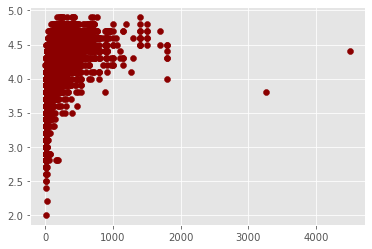

In [9]:
# Look at overall rating & price without the 'nulls' or -1
Vivino_rate_price = Vivino[(Vivino['overall_rating'] != -1) & (Vivino['price'] != -1)]
plt.scatter(Vivino_rate_price['price'],Vivino_rate_price['overall_rating'], color = 'darkred')

Text(0, 0.5, 'Overall Rating')

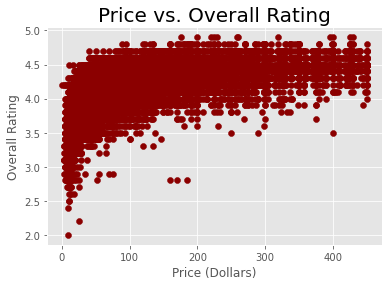

In [29]:
# Remove outliers for visibility (removing all wines above $1000 since anything 450-1000 shouldn't have come through scraping)
Vivino_rate_price = Vivino_rate_price[Vivino_rate_price['price'] < 450]
plt.scatter(Vivino_rate_price['price'],Vivino_rate_price['overall_rating'], color = 'darkred')
plt.title('Price vs. Overall Rating', fontsize = 20)
plt.xlabel('Price (Dollars)')
plt.ylabel('Overall Rating')

Text(0, 0.5, 'Overall Rating')

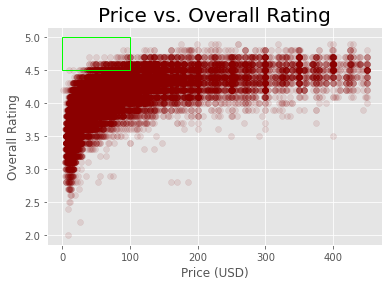

In [150]:
# Same as above, but with a box for presentation purposes.
rect = mpatches.Rectangle((0,4.5),100,0.5,linewidth = 1, edgecolor = 'lime', facecolor = 'none')
plt.scatter(Vivino_rate_price['price'],Vivino_rate_price['overall_rating'], color = 'darkred', alpha = 0.1)
plt.gca().add_patch(rect)
plt.title('Price vs. Overall Rating', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Overall Rating')

Text(0, 0.5, 'Number of Wines')

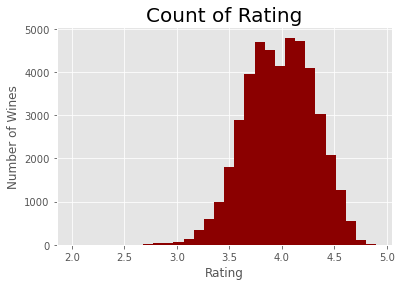

In [12]:
# Histogram of rating count
Vivino_rate = Vivino[Vivino['overall_rating'] != -1]
plt.hist(Vivino_rate['overall_rating'], bins = 30, color = 'darkred')
plt.title('Count of Rating', fontsize = 20)
plt.xlabel('Rating')
plt.ylabel('Number of Wines')

Text(0, 0.5, 'Rating Count')

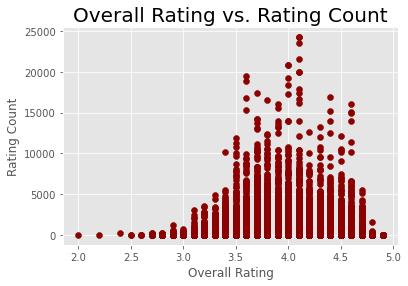

In [13]:
# Get Overall Rating vs. Rating Count
Vivino_rate_ratecount = Vivino[(Vivino['overall_rating'] != -1) & (Vivino['overall_rating_count'] != -1)]
Vivino_rate_ratecount = Vivino_rate_ratecount[Vivino_rate_ratecount['overall_rating_count'] < 40000]
plt.scatter(Vivino_rate_ratecount['overall_rating'],Vivino_rate_ratecount['overall_rating_count'], color = 'darkred')
plt.title('Overall Rating vs. Rating Count', fontsize = 20)
plt.xlabel('Overall Rating')
plt.ylabel('Rating Count')

In [14]:
# Get distribution of country records
Vivino['country'].value_counts()

United States                      14177
France                             11695
Italy                               9288
Spain                               3230
Argentina                           1827
Australia                           1309
Portugal                            1087
Chile                               1049
South Africa                         437
Israel                               163
New Zealand                          146
Austria                              123
Greece                               103
Germany                               59
Mexico                                32
Lebanon                               27
Uruguay                               26
Bulgaria                              22
Hungary                               16
Canada                                15
Georgia                               10
Switzerland                            9
Palestinian Territory, Occupied        9
Slovenia                               9
Croatia         

Text(0, 0.5, 'Number of Wines')

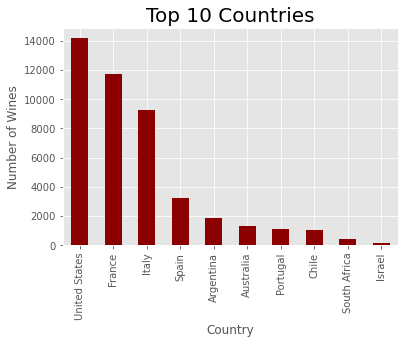

In [15]:
# Get bar graph of top 10 countries with most wine on vivino
Vivino.groupby('country')['price'].count().sort_values(ascending = False).nlargest(10).plot.bar(color = 'darkred')
plt.title('Top 10 Countries', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Number of Wines')

In [16]:
# Get top 8 countries that produce wine
top8_countries = Vivino['country'].value_counts().nlargest(8).index.tolist()
top8_countries

['United States',
 'France',
 'Italy',
 'Spain',
 'Argentina',
 'Australia',
 'Portugal',
 'Chile']

(array([1, 2, 3, 4, 5, 6, 7, 8]),
 [Text(1, 0, 'Argentina'),
  Text(2, 0, 'Australia'),
  Text(3, 0, 'Chile'),
  Text(4, 0, 'France'),
  Text(5, 0, 'Italy'),
  Text(6, 0, 'Portugal'),
  Text(7, 0, 'Spain'),
  Text(8, 0, 'United States')])

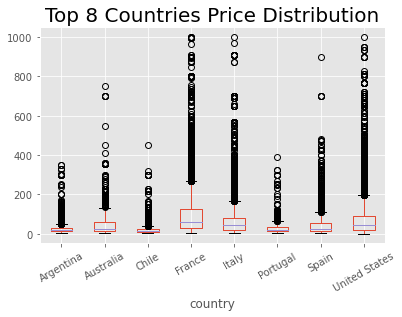

In [153]:
# Look at country & price without the 'NA' or -1
Vivino_country_price = Vivino[(Vivino['country'] != 'NA') & (Vivino['price'] != -1) & (Vivino['price'] < 1000)] 
Vivino_country_price = Vivino_country_price[Vivino_country_price['country'].isin(top8_countries)]
Vivino_country_price = Vivino_country_price[['country', 'price']]
Vivino_country_price.boxplot(by = 'country', column = 'price')
plt.suptitle('')
plt.title('Top 8 Countries Price Distribution', fontsize = 20)
plt.xticks(rotation = 30)

Text(0, 0.5, 'Price (USD)')

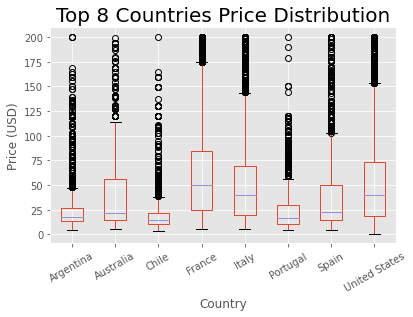

In [154]:
# Same as above, but trimmed to just look at up to $200
Vivino_country_price = Vivino[(Vivino['country'] != 'NA') & (Vivino['price'] != -1) & (Vivino['price'] < 200)] 
Vivino_country_price = Vivino_country_price[Vivino_country_price['country'].isin(top8_countries)]
Vivino_country_price = Vivino_country_price[['country', 'price']]
Vivino_country_price.boxplot(by = 'country', column = 'price')
plt.suptitle('')
plt.xticks(rotation = 30)
plt.title('Top 8 Countries Price Distribution', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Price (USD)')

In [142]:
# Statistical testing
a = Vivino_country_price.loc[Vivino_country_price['country'] == 'Argentina', 'price'].to_numpy()
b = Vivino_country_price.loc[Vivino_country_price['country'] == 'Portugal', 'price'].to_numpy()
st.ttest_ind(a = a, b = b, equal_var = True)

# Mean is VERY different.

Ttest_indResult(statistic=1.7616868418621576, pvalue=0.07822849207326191)

Text(0, 0.5, 'Mean Price of Wines (USD)')

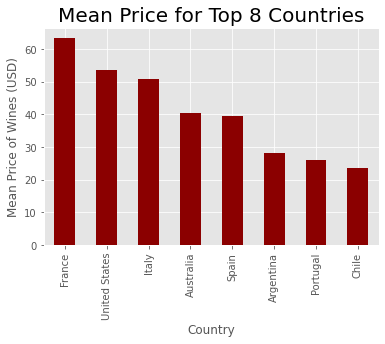

In [155]:
# Mean price of wines
Vivino_country_price.groupby('country')['price'].mean().sort_values(ascending = False).plot.bar(color = 'darkred')
plt.title('Mean Price for Top 8 Countries', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Mean Price of Wines (USD)')

Text(0, 0.5, 'Rating')

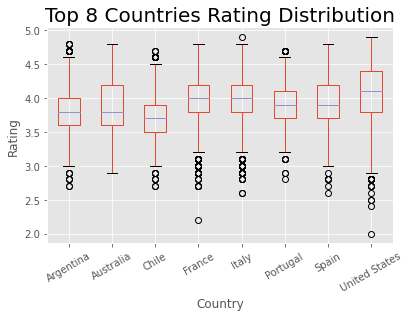

In [156]:
# Look at country & overall rating without the 'NA' or -1
Vivino_country_rating = Vivino[(Vivino['country'] != 'NA') & (Vivino['overall_rating'] != -1)] 
Vivino_country_rating = Vivino_country_rating[Vivino_country_rating['country'].isin(top8_countries)]
Vivino_country_rating = Vivino_country_rating[['country', 'overall_rating']]
Vivino_country_rating.boxplot(by = 'country', column = 'overall_rating')
plt.suptitle('')
plt.xticks(rotation = 30)
plt.title('Top 8 Countries Rating Distribution', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Rating')

In [180]:
# Statistical testing
a = Vivino_country_rating.loc[Vivino_country_rating['country'] == 'Portugal', 'overall_rating'].to_numpy()
b = Vivino_country_rating.loc[Vivino_country_rating['country'] != 'Portugal', 'overall_rating'].to_numpy()
st.ttest_ind(a = a, b = b, equal_var = True)

Ttest_indResult(statistic=-11.879371804066514, pvalue=1.700329388713541e-32)

Text(0, 0.5, 'Mean Rating of Wines')

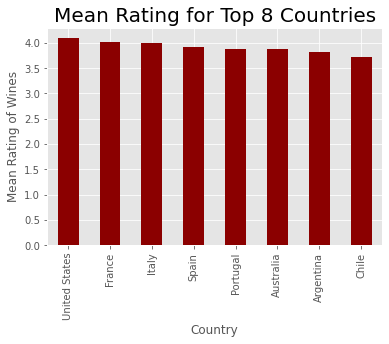

In [227]:
# Mean ratings
Vivino_country_rating.groupby('country')['overall_rating'].mean().sort_values(ascending = False).plot.bar(color = 'darkred')
plt.title('Mean Rating for Top 8 Countries', fontsize = 20)
plt.xlabel('Country')
plt.ylabel('Mean Rating of Wines')

Text(0, 0.5, 'Light-Bold Scale')

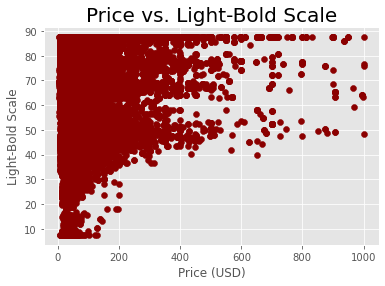

In [160]:
# Look at how light-bold measures line up with price
Vivino_lightbold_price = Vivino[(Vivino['light_bold'] != -1) & (Vivino['price'] != -1) & (Vivino['overall_rating'] != -1)]
Vivino_lightbold_price = Vivino_lightbold_price[Vivino_lightbold_price['price'] < 1000]
plt.scatter(Vivino_lightbold_price['price'],Vivino_lightbold_price['light_bold'], color = 'darkred')
plt.title('Price vs. Light-Bold Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Light-Bold Scale')

# More bold wines tend to be more expensive

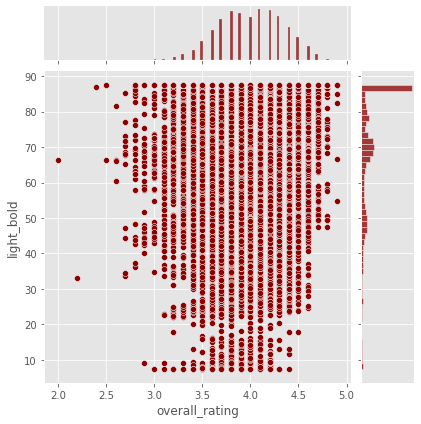

In [229]:
# Joint plot of rating to scale above
sns.jointplot(x = Vivino_lightbold_price['overall_rating'],y = Vivino_lightbold_price['light_bold'], color = 'darkred')

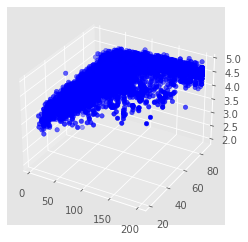

In [200]:
# Attempt at creating a 3D graphic... because there is too much data, it's hard to interpret.
Vivino_lightbold_price_US = Vivino_lightbold_price[Vivino_lightbold_price['country'] == 'United States']
plt.axes(projection = "3d").scatter3D(Vivino_lightbold_price_US['price'],Vivino_lightbold_price_US['light_bold'],Vivino_lightbold_price_US['overall_rating'], color = "blue")

Text(0, 0.5, 'Smooth-Tannic Scale')

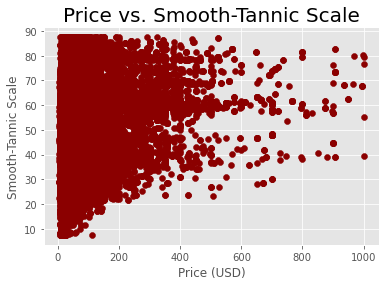

In [159]:
# Look at how smooth-tannic measures line up with price
Vivino_smoothtannic_price = Vivino[(Vivino['smooth_tannic'] != -1) & (Vivino['price'] != -1) & (Vivino['overall_rating'] != -1)]
Vivino_smoothtannic_price = Vivino_smoothtannic_price[Vivino_smoothtannic_price['price'] < 1000]
plt.scatter(Vivino_smoothtannic_price['price'],Vivino_smoothtannic_price['smooth_tannic'], color = 'darkred')
plt.title('Price vs. Smooth-Tannic Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Smooth-Tannic Scale')

# Fairly well spread out, but wines that are more tannic seem to be pricier

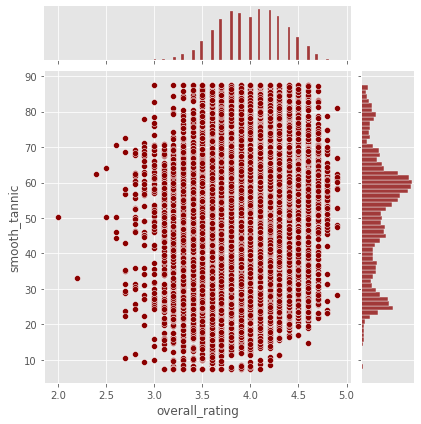

In [231]:
# Joint plot of rating to scale above
sns.jointplot(x = Vivino_smoothtannic_price['overall_rating'],y = Vivino_smoothtannic_price['smooth_tannic'], color = 'darkred')

Text(0, 0.5, 'Dry-Sweet Scale')

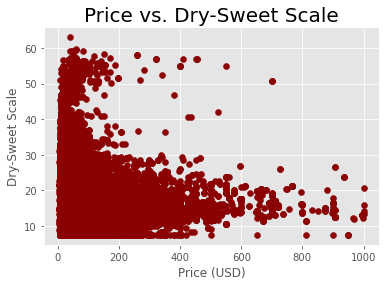

In [161]:
# Look at how dry-sweet measures line up with price
Vivino_drysweet_price = Vivino[(Vivino['dry_sweet'] != -1) & (Vivino['price'] != -1) & (Vivino['overall_rating'] != -1)]
Vivino_drysweet_price = Vivino_drysweet_price[Vivino_drysweet_price['price'] < 1000]
plt.scatter(Vivino_drysweet_price['price'],Vivino_drysweet_price['dry_sweet'], color = 'darkred')
plt.title('Price vs. Dry-Sweet Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Dry-Sweet Scale')

# Dry wines are more expensive

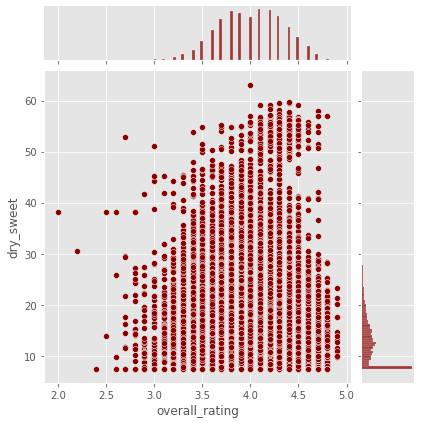

In [233]:
# Joint plot of rating to scale above
sns.jointplot(x = Vivino_drysweet_price['overall_rating'],y = Vivino_drysweet_price['dry_sweet'], color = 'darkred')

Text(0, 0.5, 'Soft-Acidic Scale')

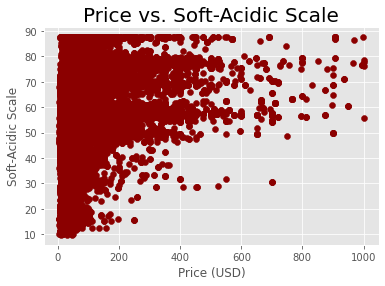

In [162]:
# Look at how soft-acidic measures line up with price
Vivino_softacidic_price = Vivino[(Vivino['soft_acidic'] != -1) & (Vivino['price'] != -1) & (Vivino['overall_rating'] != -1)]
Vivino_softacidic_price = Vivino_softacidic_price[Vivino_softacidic_price['price'] < 1000]
plt.scatter(Vivino_softacidic_price['price'],Vivino_softacidic_price['soft_acidic'], color = 'darkred')
plt.title('Price vs. Soft-Acidic Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Soft-Acidic Scale')

# Acidic wines are more expensive

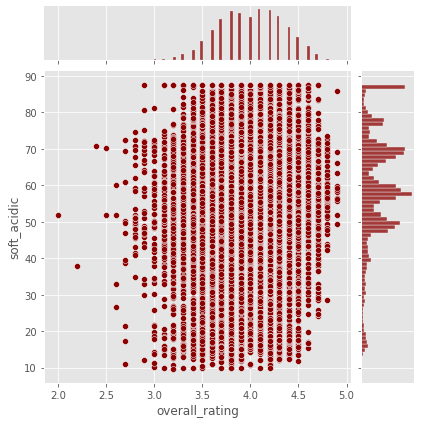

In [235]:
# Joint plot of rating to scale above
sns.jointplot(x = Vivino_softacidic_price['overall_rating'],y = Vivino_softacidic_price['soft_acidic'], color = 'darkred')

<AxesSubplot:xlabel='overall_rating', ylabel='Density'>

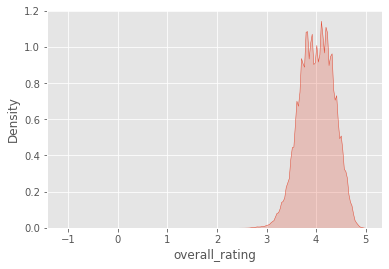

In [178]:
# Look at dennsity plot
import seaborn as sns
Vivino_ratedensity = Vivino[Vivino['overall_rating'] != -1]
sns.kdeplot(Vivino['overall_rating'], shade = True)

In [54]:
# Extract the best value wines
Vivino_best = Vivino[(Vivino['overall_rating'] > 4.5) & (Vivino['price'] < 100)]

In [55]:
Vivino_best.describe()

,year,overall_rating,overall_rating_count,price,light_bold,smooth_tannic,dry_sweet,soft_acidic
count,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000,194.000000
mean,2013.989691,4.613402,223.072165,80.446546,67.788251,44.618340,14.018531,51.790714
std,5.366360,0.037066,651.515837,18.817872,25.306973,19.691983,8.504298,19.098443
min,1982.000000,4.600000,25.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,2014.000000,4.600000,36.250000,69.960000,54.856925,27.827300,9.156737,49.152300
50%,2016.000000,4.600000,54.000000,84.970000,78.159700,53.552200,12.963610,56.960400
75%,2017.000000,4.600000,120.500000,95.217500,87.500000,59.276450,17.803825,61.518050
max,2019.000000,4.800000,5496.000000,99.990000,87.500000,81.603200,54.393700,87.500000


In [115]:
# Create jitter for better display
t = np.random.randint(low = 1, high = 3, size = len(Vivino_best_rate_price['overall_rating']))
t2 = t / np.random.randint(low = 30, high = 50, size = len(Vivino_best_rate_price['overall_rating'])) - 0.03
Vivino_best_rate_price['jittered_rating'] =  Vivino_best_rate_price['overall_rating'] + t2
Vivino_best_rate_price.head()

<ipython-input-115-6901b03e8c93>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Vivino_best_rate_price['jittered_rating'] =  Vivino_best_rate_price['overall_rating'] + t2


,winery,wine_type,city,country,wine_name,year,overall_rating,overall_rating_count,price,light_bold,smooth_tannic,dry_sweet,soft_acidic,jittered_rating
21614,St Hallett,Red wine,Barossa,Australia,Old Block Shiraz,2003,4.7,36,39.99,87.5000,48.9796,24.27340,46.7105,4.736667
21615,Viu Manent,Red wine,Colchagua Valley,Chile,Viu 1,1999,4.6,57,73.99,71.5354,35.2861,23.73550,39.6796,4.630606
21616,Château Soleil,Red wine,Lussac-Saint-Émilion,France,Le Rival Lussac Saint Emilion,2015,4.6,42,39.95,76.8944,60.6690,8.85563,61.5833,4.592222
22913,Stolpman Vineyards,Red wine,Ballard Canyon,United States,La Croce,2014,4.6,36,44.99,87.5000,59.9078,7.50000,67.9480,4.592222
22914,Broadley,Red wine,Willamette Valley,United States,Marcile Lorraine Pinot Noir,2017,4.6,27,41.99,24.6519,25.4800,14.12553,73.8755,4.592727


Text(0, 0.5, 'Rating')

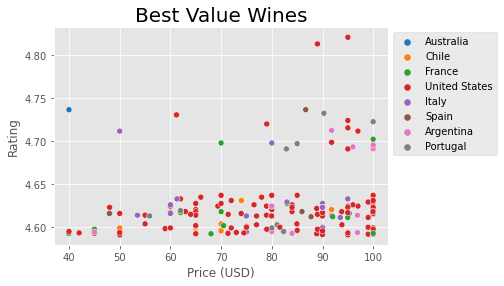

In [157]:
# Plot the best value wines by price vs. rating
sns.scatterplot(data = Vivino_best_rate_price, x = 'price', y = 'jittered_rating', hue = 'country', palette = "tab10")
plt.legend(bbox_to_anchor = (1,1))
plt.title('Best Value Wines', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Rating')

In [118]:
Vivino_best_rate_price['country'].value_counts()

United States    119
Italy             17
Argentina         14
France            13
Portugal          10
Spain              7
Chile              7
Australia          1
Name: country, dtype: int64

Text(0, 0.5, 'Light-Bold Scale')

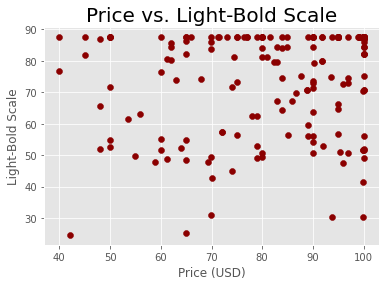

In [165]:
# Look at how light-bold measures line up with price
Vivino_best_lightbold_price = Vivino_best_rate_price[(Vivino_best_rate_price['light_bold'] != -1) & (Vivino_best_rate_price['price'] != -1) & (Vivino_best_rate_price['overall_rating'] != -1)]
plt.scatter(Vivino_best_lightbold_price['price'],Vivino_best_lightbold_price['light_bold'], color = 'darkred')
plt.title('Price vs. Light-Bold Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Light-Bold Scale')

<Figure size 1080x720 with 0 Axes>

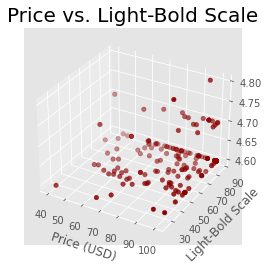

<Figure size 1080x720 with 0 Axes>

In [163]:
# Create 3D graph of best value wine for light_bold
plt.axes(projection = "3d").scatter3D(Vivino_best_lightbold_price['price'],Vivino_best_lightbold_price['light_bold'],Vivino_best_lightbold_price['overall_rating'], color = "darkred")
plt.title('Price vs. Light-Bold Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Light-Bold Scale')
plt.figure(figsize = (15,10))

Text(0, 0.5, 'Smooth-Tannic Scale')

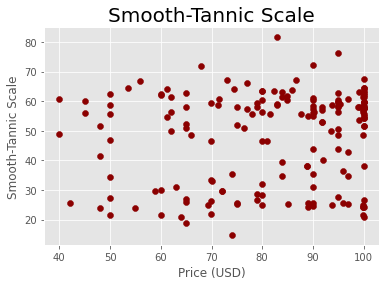

In [164]:
# Look at how smooth-tannic measures line up with price
Vivino_best_smoothtannic_price = Vivino_best_rate_price[(Vivino_best_rate_price['smooth_tannic'] != -1) & (Vivino_best_rate_price['price'] != -1) & (Vivino_best_rate_price['overall_rating'] != -1)]
plt.scatter(Vivino_best_smoothtannic_price['price'],Vivino_best_smoothtannic_price['smooth_tannic'], color = 'darkred')
plt.title('Smooth-Tannic Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Smooth-Tannic Scale')

<Figure size 1080x720 with 0 Axes>

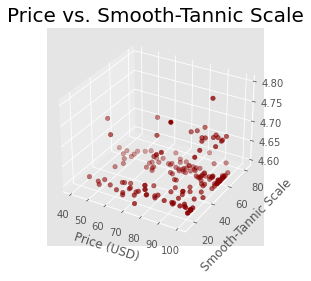

<Figure size 1080x720 with 0 Axes>

In [166]:
# Create 3D graph of best value wine for smooth_tannnic
plt.axes(projection = "3d").scatter3D(Vivino_best_smoothtannic_price['price'],Vivino_best_smoothtannic_price['smooth_tannic'],Vivino_best_smoothtannic_price['overall_rating'], color = "darkred")
plt.title('Price vs. Smooth-Tannic Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Smooth-Tannic Scale')
plt.figure(figsize = (15,10))

Text(0, 0.5, 'Dry-Sweet Scale')

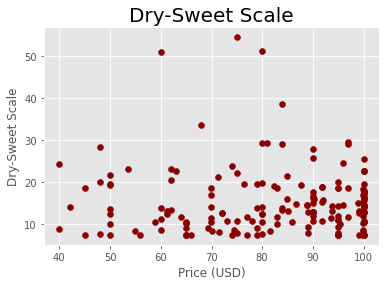

In [167]:
# Look at how dry-sweet measures line up with price
Vivino_best_drysweet_price = Vivino_best_rate_price[(Vivino_best_rate_price['dry_sweet'] != -1) & (Vivino_best_rate_price['price'] != -1) & (Vivino_best_rate_price['overall_rating'] != -1)]
plt.scatter(Vivino_best_drysweet_price['price'],Vivino_best_drysweet_price['dry_sweet'], color = 'darkred')
plt.title('Dry-Sweet Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Dry-Sweet Scale')

<Figure size 1080x720 with 0 Axes>

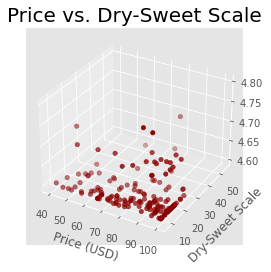

<Figure size 1080x720 with 0 Axes>

In [168]:
# Create 3D graph of best value wine for dry_sweet
plt.axes(projection = "3d").scatter3D(Vivino_best_drysweet_price['price'],Vivino_best_drysweet_price['dry_sweet'],Vivino_best_drysweet_price['overall_rating'], color = "darkred")
plt.title('Price vs. Dry-Sweet Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Dry-Sweet Scale')
plt.figure(figsize = (15,10))

Text(0, 0.5, 'Soft-Acidic Scale')

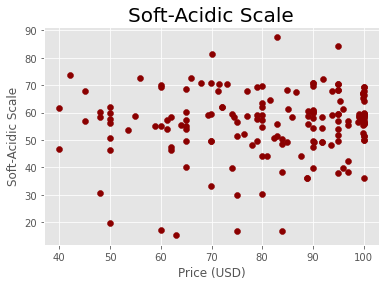

In [169]:
# Look at how Soft-Acidic measures line up with price
Vivino_best_softacidic_price = Vivino_best_rate_price[(Vivino_best_rate_price['soft_acidic'] != -1) & (Vivino_best_rate_price['price'] != -1) & (Vivino_best_rate_price['overall_rating'] != -1)]
plt.scatter(Vivino_best_softacidic_price['price'],Vivino_best_softacidic_price['soft_acidic'], color = 'darkred')
plt.title('Soft-Acidic Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Soft-Acidic Scale')

<Figure size 1080x720 with 0 Axes>

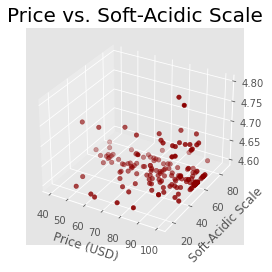

<Figure size 1080x720 with 0 Axes>

In [170]:
# Create 3D graph of best value wine for soft_acidic
plt.axes(projection = "3d").scatter3D(Vivino_best_softacidic_price['price'],Vivino_best_softacidic_price['soft_acidic'],Vivino_best_softacidic_price['overall_rating'], color = "darkred")
plt.title('Price vs. Soft-Acidic Scale', fontsize = 20)
plt.xlabel('Price (USD)')
plt.ylabel('Soft-Acidic Scale')
plt.figure(figsize = (15,10))

In [149]:
Vivino[(Vivino['overall_rating'] > 4.4) & (Vivino['price'] <= 100)]['country'].value_counts()

United States    535
Italy             79
Spain             54
France            38
Argentina         37
Portugal          28
Chile             17
Australia         13
Israel             5
South Africa       5
Moldova            2
Switzerland        1
Mexico             1
Name: country, dtype: int64

In [181]:
Vivino_bestofbest = Vivino_best[(Vivino_best['soft_acidic'] != -1) & (Vivino_best['dry_sweet'] != -1) & (Vivino_best['smooth_tannic'] != -1) & (Vivino_best['light_bold'] != -1) & (Vivino_best['price'] != -1) & (Vivino_best['overall_rating'] != -1)]

<Figure size 1080x720 with 0 Axes>

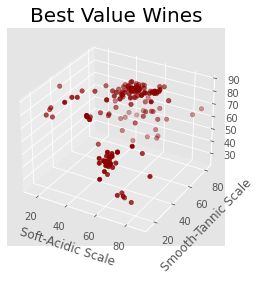

<Figure size 1080x720 with 0 Axes>

In [188]:
# Create 3D plot of the notes
plt.axes(projection = "3d").scatter3D(Vivino_bestofbest['soft_acidic'],Vivino_bestofbest['smooth_tannic'],Vivino_bestofbest['light_bold'], color = 'darkred')
plt.title('Best Value Wines', fontsize = 20)
plt.xlabel('Soft-Acidic Scale')
plt.ylabel('Smooth-Tannic Scale')
plt.figure(figsize = (15,10))